In [ ]:
import pandas as pd

df = pd.read_csv("../data/PaySim_stream.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,399,CASH_IN,134026.34,C993872822,602.0,134628.34,C786960629,0.00,0.00,0,0
1,399,CASH_IN,256289.51,C734624004,140.0,256429.51,C1844307683,11063.34,0.00,0,0
2,399,CASH_OUT,105813.06,C2112729029,29762.0,0.00,C137554848,35547.12,141360.19,0,0
3,399,PAYMENT,50199.15,C2016143960,30629.0,0.00,M689597968,0.00,0.00,0,0
4,399,CASH_OUT,104446.36,C1232806766,101215.0,0.00,C1117209015,62403.45,166849.81,0,0


In [ ]:
print(df.info())
print()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636262 entries, 0 to 636261
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            636262 non-null  int64  
 1   type            636262 non-null  object 
 2   amount          636262 non-null  float64
 3   nameOrig        636262 non-null  object 
 4   oldbalanceOrg   636262 non-null  float64
 5   newbalanceOrig  636262 non-null  float64
 6   nameDest        636262 non-null  object 
 7   oldbalanceDest  636262 non-null  float64
 8   newbalanceDest  636262 non-null  float64
 9   isFraud         636262 non-null  int64  
 10  isFlaggedFraud  636262 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 53.4+ MB
None



,count,mean,std,min,25%,50%,75%,max
step,636262.0,5.008302e+02,1.019500e+02,399.0,403.0000,490.000,5.850000e+02,7.430000e+02
amount,636262.0,1.671572e+05,4.129356e+05,0.0,12822.5675,69825.775,1.998886e+05,1.541594e+07
oldbalanceOrg,636262.0,7.442636e+05,2.513775e+06,0.0,0.0000,16030.500,1.075898e+05,5.958504e+07
newbalanceOrig,636262.0,7.591753e+05,2.539468e+06,0.0,0.0000,0.000,1.402269e+05,4.958504e+07
oldbalanceDest,636262.0,1.191910e+06,4.084201e+06,0.0,0.0000,104851.355,9.017523e+05,3.560159e+08
newbalanceDest,636262.0,1.282941e+06,4.150366e+06,0.0,0.0000,182203.155,1.039750e+06,3.561793e+08
isFraud,636262.0,5.915802e-03,7.668647e-02,0.0,0.0000,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,636262.0,1.886016e-05,4.342790e-03,0.0,0.0000,0.000,0.000000e+00,1.000000e+00


Nombre de fraudes par type de transaction :
type
CASH_IN        0
CASH_OUT    1882
DEBIT          0
PAYMENT        0
TRANSFER    1882
Name: isFraud, dtype: int64

Distribution des transactions frauduleuses vs non frauduleuses :
type
CASH_IN     141641
CASH_OUT    212038
DEBIT         4660
PAYMENT     221147
TRANSFER     56776
Name: isFraud, dtype: int64


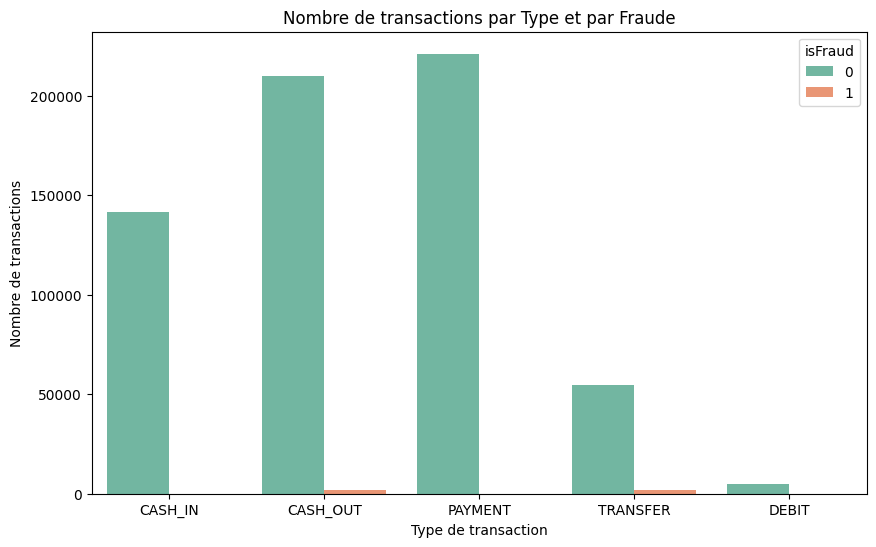

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns


type_de_fraudes = df.groupby('type')['isFraud'].sum()
distribution_fraudes = df.groupby('type')['isFraud'].count()

print("Nombre de fraudes par type de transaction :")
print(type_de_fraudes)

print("\nDistribution des transactions frauduleuses vs non frauduleuses :")
print(distribution_fraudes)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', hue='isFraud', palette='Set2')
plt.title("Nombre de transactions par Type et par Fraude")
plt.xlabel("Type de transaction")
plt.ylabel("Nombre de transactions")
plt.savefig("bar_chart_types.png")

c:\Users\jb_le\AppData\Local\Programs\Python\Python314\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


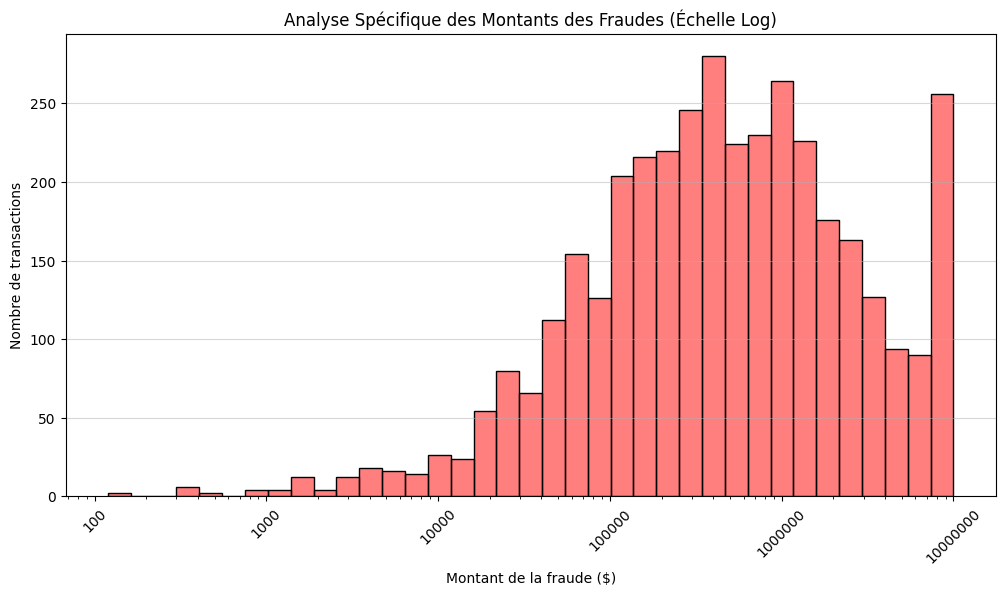

In [ ]:
import matplotlib.ticker as ticker


df_fraude = df[df['isFraud'] == 1]

plt.figure(figsize=(12, 6))


sns.histplot(df_fraude['amount'], kde=True, color='red', log_scale=True)

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)

plt.title('Analyse Spécifique des Montants des Fraudes (Échelle Log)')
plt.xlabel('Montant de la fraude ($)')
plt.ylabel('Nombre de transactions')
plt.grid(axis='y', alpha=0.5)

plt.show()

In [ ]:
df_fraud = df[df['isFraud'] == 1].copy()

# 2. On extrait la première lettre (C ou M) des noms
df_fraud['type_Orig'] = df_fraud['nameOrig'].str[0]
df_fraud['type_Dest'] = df_fraud['nameDest'].str[0]

# 3. On fait le GroupBy pour compter
print("Répartition des comptes à l'ORIGINE des fraudes :")
print(df_fraud.groupby('type_Orig').size())

print("\nRépartition des comptes à la DESTINATION des fraudes :")
print(df_fraud.groupby('type_Dest').size())

Répartition des comptes à l'ORIGINE des fraudes :
type_Orig
C    3764
dtype: int64

Répartition des comptes à la DESTINATION des fraudes :
type_Dest
C    3764
dtype: int64


In [63]:
# 1. On crée une liste des nameDest impliqués dans une fraude
fraud_dest_counts = df[df['isFraud'] == 1]['nameDest'].value_counts()

# 2. On affiche les comptes qui apparaissent le plus souvent comme receveurs de fraude
print("Comptes destinataires ayant reçu plusieurs fraudes :")
print(fraud_dest_counts[fraud_dest_counts > 1])

# 3. Pour aller plus loin : quel est le max de fraudes reçues par un seul compte ?
print(f"\nNombre maximum de fraudes reçues par un seul compte : {fraud_dest_counts.max()}")

Comptes destinataires ayant reçu plusieurs fraudes :
nameDest
C14138104      2
C1669818195    2
C1655359478    2
C686334805     2
C1193568854    2
Name: count, dtype: int64

Nombre maximum de fraudes reçues par un seul compte : 2


In [67]:
# On regarde le taux de fraude par compte destinataire
dest_stats = df.groupby('nameDest')['isFraud'].agg(['count', 'sum'])
dest_stats.columns = ['total_transactions', 'total_fraudes']

# On affiche les comptes qui ont reçu au moins 2 transactions et dont 100% sont des fraudes
comptes_suspects = dest_stats[(dest_stats['total_transactions'] > 1) & 
                              (dest_stats['total_transactions'] == dest_stats['total_fraudes'])]

print(f"Nombre de comptes ayant reçu plusieurs transactions, toutes frauduleuses : {len(comptes_suspects)}")

Nombre de comptes ayant reçu plusieurs transactions, toutes frauduleuses : 3


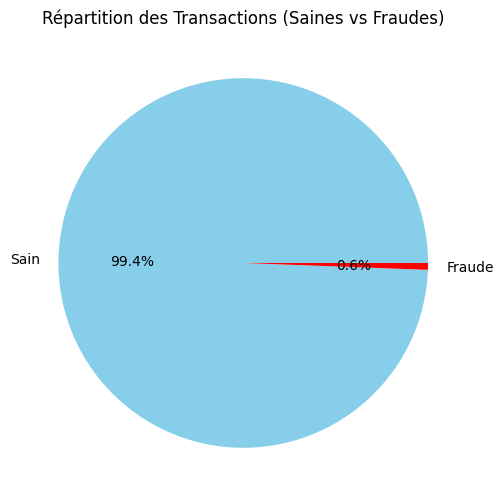

In [65]:
# On compte le nombre de fraudes (1) et de transactions saines (0)
counts = df['isFraud'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=['Sain', 'Fraude'], autopct='%.1f%%',colors=['skyblue', 'red'])
plt.title("Répartition des Transactions (Saines vs Fraudes)")
plt.savefig("pie_chart_fraude.png")

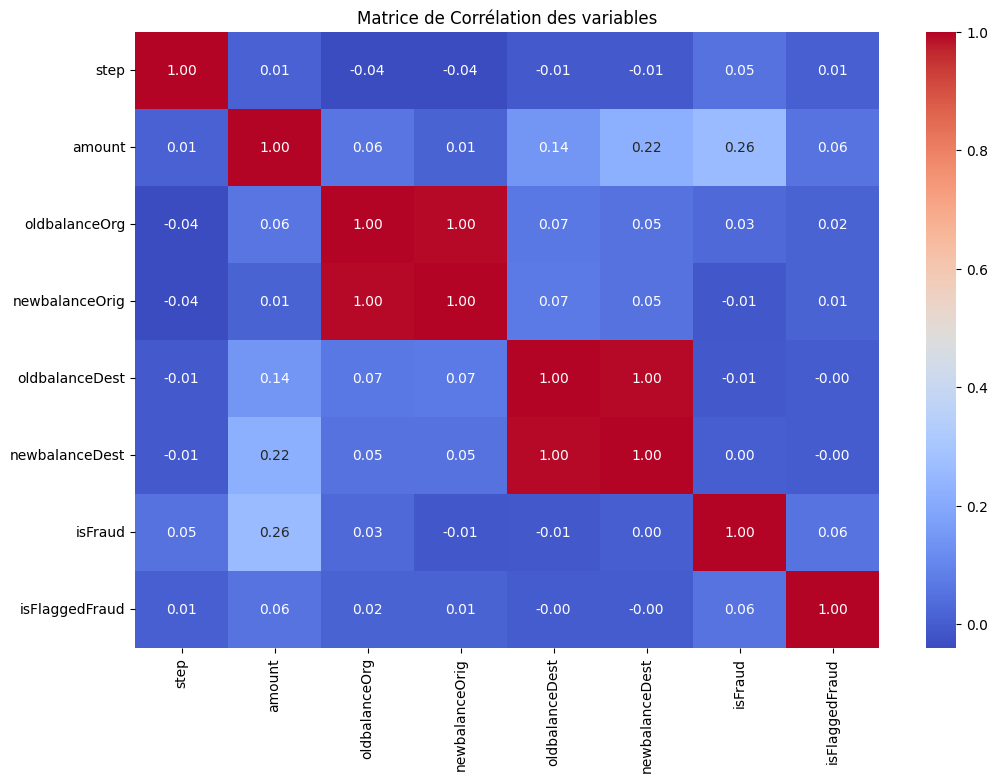

In [66]:
plt.figure(figsize=(12, 8))
# On ne garde que les colonnes numériques pour le calcul
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de Corrélation des variables")
plt.savefig("heatmap_correlation.png")